In [16]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import *
X, y = make_classification(n_samples=35000, n_features=14, n_informative=12,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.02, 0.98],
                           class_sep=0.8, random_state=0)



## BorderlineSMOTE

In [17]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE

X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.98, 0.02], n_informative=10, n_redundant=1, flip_y=0,
n_features=14, n_clusters_per_class=1, n_samples=35000, random_state=10)

print('Original dataset shape %s' % Counter(y))
sm = BorderlineSMOTE(sampling_strategy = 0.4,random_state=42, kind='borderline-1')
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))



Original dataset shape Counter({0: 34300, 1: 700})
Resampled dataset shape Counter({0: 34300, 1: 13720})


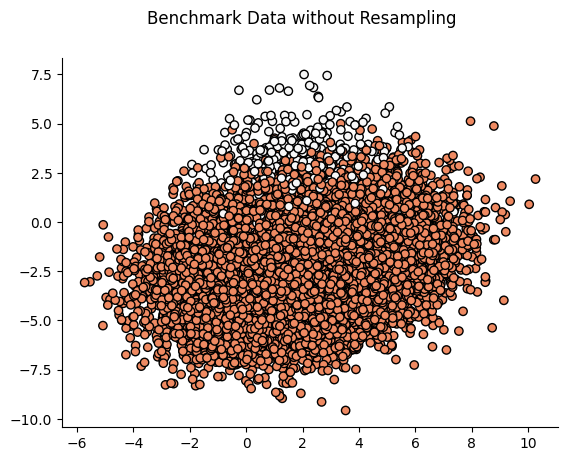

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}

plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data without Resampling")
pass

In [19]:
X_res.shape

(48020, 14)

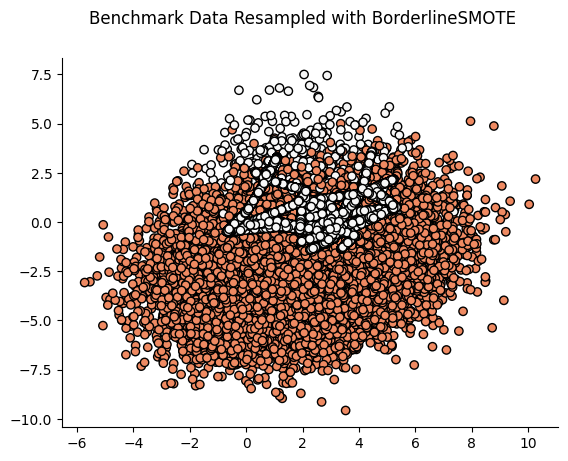

In [20]:

colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_res]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with BorderlineSMOTE")
pass


## KMeansSMOTE

In [21]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE, KMeansSMOTE

X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.98, 0.02], n_informative=10, n_redundant=1, flip_y=0,
n_features=14, n_clusters_per_class=1, n_samples=35000, random_state=10)

print('Original dataset shape %s' % Counter(y))
sm = KMeansSMOTE(sampling_strategy = 0.3,random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 34300, 1: 700})


RuntimeError: No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.

In [ ]:
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_res]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with KMeansSMOTE")
pass

## ADASYN

In [22]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN

X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.98, 0.02], n_informative=10, n_redundant=1, flip_y=0,
n_features=14, n_clusters_per_class=1, n_samples=35000, random_state=10)

print('Original dataset shape %s' % Counter(y))
sm = ADASYN(sampling_strategy = 0.3,random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 34300, 1: 700})
Resampled dataset shape Counter({0: 34300, 1: 10288})


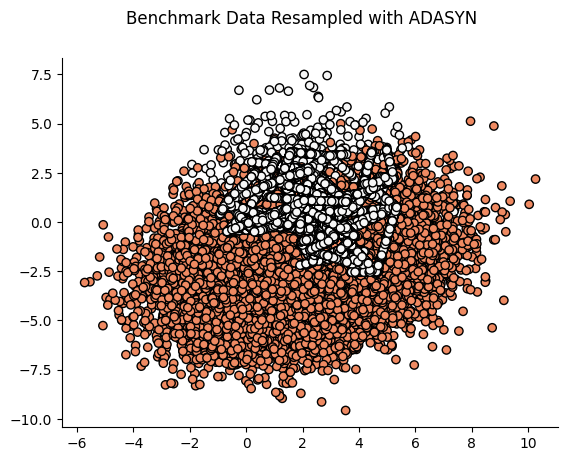

In [24]:
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_res]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.scatter(X_res[:, 0], X_res[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with ADASYN")
pass

## Conclusions

From the above plots, it can be observed that **ADASYN** over-sampling method seems to be the best technique